# Proyek Analisis Data: E-Commerce Public Dataset

## Menentukan Pertanyaan Bisnis

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memasukkan semua dataset yang dibutuhkan

In [2]:
customers = pd.read_csv("customers_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
payments = pd.read_csv("order_payments_dataset.csv")
reviews = pd.read_csv("order_reviews_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
category_name = pd.read_csv("product_category_name_translation.csv")
products = pd.read_csv("products_dataset.csv")
sellers = pd.read_csv("sellers_dataset.csv")

Menggabungkan beberapa data kedalam sebuah dataframe, yaitu
order_items (order_items, products, category_name, reviews)
orders (orders, customers, payments)

In [3]:
# Menambahkan category_name pada tabel products
products = pd.merge(products, category_name, how="left", on="product_category_name")

# Mengambil kolom yang dibutuhkan saja
products = products[["product_id", "product_category_name", "product_category_name_english"]]

In [4]:
# Menambahkan products pada tabel order_items
order_items = order_items.merge(products, left_on="product_id", right_on="product_id", how="left")

In [5]:
# Menambahkan reviews pada tabel order_items
order_items = pd.merge(order_items, reviews, how="left", on="order_id")

In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [7]:
# Mengambil kolom yang dibutuhkan saja
orders = orders[["order_id", "customer_id", "order_status", "order_purchase_timestamp"]]

# Menggabungkan orders, customers, dan payments
orders = pd.merge(orders, customers, how="left", on="customer_id")
orders = pd.merge(orders, payments, how="left", on="order_id")

In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


### Assessing Data

#### Menilai Data order_items

In [9]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   order_item_id                  113314 non-null  int64  
 2   product_id                     113314 non-null  object 
 3   seller_id                      113314 non-null  object 
 4   shipping_limit_date            113314 non-null  object 
 5   price                          113314 non-null  float64
 6   freight_value                  113314 non-null  float64
 7   product_category_name          111702 non-null  object 
 8   product_category_name_english  111678 non-null  object 
 9   review_id                      112372 non-null  object 
 10  review_score                   112372 non-null  float64
 11  review_comment_title           13434 non-null   object 
 12  review_comment_message        

shipping_limit_date, review_creation_date, review_answer_timestamp seharusnya data bertipe datetime

In [10]:
order_items.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1612
product_category_name_english     1636
review_id                          942
review_score                       942
review_comment_title             99880
review_comment_message           65672
review_creation_date               942
review_answer_timestamp            942
dtype: int64

Terdapat banyak missing value

In [11]:
print("Jumlah data terduplikasi:", order_items.duplicated().sum())
order_items.describe()

Jumlah data terduplikasi: 0


,order_item_id,price,freight_value,review_score
count,113314.000000,113314.000000,113314.000000,112372.000000
mean,1.198528,120.478701,19.979428,4.032473
std,0.707016,183.279678,15.783227,1.387849
min,1.000000,0.850000,0.000000,1.000000
25%,1.000000,39.900000,13.080000,4.000000
50%,1.000000,74.900000,16.260000,5.000000
75%,1.000000,134.900000,21.150000,5.000000
max,21.000000,6735.000000,409.680000,5.000000


#### Menilai Data orders

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  103887 non-null  object 
 1   customer_id               103887 non-null  object 
 2   order_status              103887 non-null  object 
 3   order_purchase_timestamp  103887 non-null  object 
 4   customer_unique_id        103887 non-null  object 
 5   customer_zip_code_prefix  103887 non-null  int64  
 6   customer_city             103887 non-null  object 
 7   customer_state            103887 non-null  object 
 8   payment_sequential        103886 non-null  float64
 9   payment_type              103886 non-null  object 
 10  payment_installments      103886 non-null  float64
 11  payment_value             103886 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 9.5+ MB


order_purchase_timestamp seharusnya data berupa datetime

In [13]:
orders.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
payment_sequential          1
payment_type                1
payment_installments        1
payment_value               1
dtype: int64

Terdapat 1 missing value pada data payment

In [14]:
print("Jumlah data terduplikasi:", orders.duplicated().sum())
orders.describe()

Jumlah data terduplikasi: 0


,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,103887.000000,103886.000000,103886.000000,103886.000000
mean,35072.353490,1.092679,2.853349,154.100380
std,29743.416343,0.706584,2.687051,217.494064
min,1003.000000,1.000000,0.000000,0.000000
25%,11367.500000,1.000000,1.000000,56.790000
50%,24360.000000,1.000000,1.000000,100.000000
75%,58418.000000,1.000000,4.000000,171.837500
max,99990.000000,29.000000,24.000000,13664.080000


### Cleaning Data

#### Membersihkan Data order_items

In [15]:
# Mengubah menjadi data bertipe datetime
datetime = ["shipping_limit_date", "review_creation_date", "review_answer_timestamp"]

for column in datetime:
    order_items[column] = pd.to_datetime(order_items[column])

order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   shipping_limit_date            113314 non-null  datetime64[ns]
 5   price                          113314 non-null  float64       
 6   freight_value                  113314 non-null  float64       
 7   product_category_name          111702 non-null  object        
 8   product_category_name_english  111678 non-null  object        
 9   review_id                      112372 non-null  object        
 10  review_score                   112372 non-null  float64       
 11  

Karena kita tidak tau jenis produknya, untuk mengatasi missing value pada product_category_name kita isi dengan undefined.
Untuk missing value pada product_category_name_english mengikuti nama yang tertera pada product_category_name

In [16]:
# Mengatasi missing value pada product_category_name
order_items["product_category_name"].fillna("undefined", inplace=True)
order_items.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_category_name_english     1636
review_id                          942
review_score                       942
review_comment_title             99880
review_comment_message           65672
review_creation_date               942
review_answer_timestamp            942
dtype: int64

In [17]:
# Mengisi nilai product_category_name_english dengan undefined jika product_category_name juga undefined
for x in order_items.index:
  if order_items.loc[x, "product_category_name"] == "undefined":
    order_items.loc[x, "product_category_name_english"] = "undefined"

order_items.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_category_name_english       24
review_id                          942
review_score                       942
review_comment_title             99880
review_comment_message           65672
review_creation_date               942
review_answer_timestamp            942
dtype: int64

In [18]:
# Mengatasi missing value yang tersisa pada product_category_name_english
order_items[order_items["product_category_name_english"].isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3247,0745fd0c5e5bd55f752798a152b1d04b,1,a4756663d007b0cd1af865754d08d968,7aa538dd6e114e503a2e6154ea352253,2018-08-23 04:30:19,83.90,19.78,portateis_cozinha_e_preparadores_de_alimentos,NaN,548841b1cd10c8a55d18a16cdd8cd34b,5.0,Dez,Excelente!! Bem antes do prazo.Perfeito.,2018-08-31,2018-09-01 13:16:52
13057,1d7542bb5262913fe0516f7943b69a58,1,6727051471a0fc4a0e7737b57bff2549,1961c3e1272bfeceb05d0b78b5bbfdaf,2018-08-01 23:45:09,219.00,9.69,pc_gamer,NaN,fb392fc072c42b159c666f0d547911ec,5.0,NaN,NaN,2018-08-01,2018-08-02 11:02:46
13058,1d7542bb5262913fe0516f7943b69a58,2,6727051471a0fc4a0e7737b57bff2549,1961c3e1272bfeceb05d0b78b5bbfdaf,2018-08-01 23:45:09,219.00,9.69,pc_gamer,NaN,fb392fc072c42b159c666f0d547911ec,5.0,NaN,NaN,2018-08-01,2018-08-02 11:02:46
13106,1d911134e95ec6f299e80fe19b5b88c5,1,cb9d764f38ee4d0c00af64d5c388f837,ea1776927851da2532aa70d6a32c095a,2018-08-09 22:35:17,34.90,15.34,portateis_cozinha_e_preparadores_de_alimentos,NaN,e97be4601a6fa63ed4bb9f20a944a396,1.0,NaN,Sempre comprei na americas.com e os pedidos ch...,2018-08-30,2018-08-30 11:39:13
18752,2ad4df0af7a71d632dccc0129bee3268,1,dbe520fb381ad695a7e1f2807d20c765,1961c3e1272bfeceb05d0b78b5bbfdaf,2018-08-03 16:44:57,239.00,10.42,pc_gamer,NaN,ba287bd4bd3be5d9d37a908f25e21308,1.0,NaN,Ainda não recebi o produto e tbm recebi uma ou...,2018-08-04,2018-08-06 15:23:59
19831,2d3bc1f6ed458a137c51adc3cab7a488,1,c7a3f1a7f9eef146cc499368b578b884,ba90964cff9b9e0e6f32b23b82465f7b,2018-08-08 09:35:13,1099.00,40.17,portateis_cozinha_e_preparadores_de_alimentos,NaN,240bd4986d74f290714059c3b1e456d0,3.0,Atenção,Infelizmente a informação principal em relação...,2018-08-11,2018-08-14 15:05:29
32015,4821d5af4c2ac98b0f70e47c5d845520,1,0105b5323d24fc655f73052694dbbb3a,2138ccb85b11a4ec1e37afbd1c8eda1f,2017-04-28 20:10:07,129.99,15.08,pc_gamer,NaN,078d5f1955b24a5ce19bfcae26c021a7,1.0,NaN,NaN,2017-05-03,2017-05-06 21:46:10
33102,4a8493d781a65dfb623103a5dedf44fa,1,6727051471a0fc4a0e7737b57bff2549,1961c3e1272bfeceb05d0b78b5bbfdaf,2018-08-23 04:55:37,219.00,19.63,pc_gamer,NaN,c9ec20fa7c49d29faacc03c26bc22c21,4.0,NaN,NaN,2018-08-30,2018-08-30 18:11:59
37206,53fa17c349c4b3dcbbadd8aad2eb559b,1,7afdd65f79f63819ff5bee328843fa37,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30,portateis_cozinha_e_preparadores_de_alimentos,NaN,b42930fa8858cb96c2a2721f08ed3348,3.0,Produto errado,Comprei o copo cristalino e chegou o leitoso. ...,2018-08-10,2018-08-12 17:45:26
37313,542dd8c7a80f7006b56c9cbb95e6433b,1,bed164d9d628cf0593003389c535c6e0,ea1776927851da2532aa70d6a32c095a,2018-07-26 18:05:18,34.90,18.34,portateis_cozinha_e_preparadores_de_alimentos,NaN,76e7f71eeb323254d3ec8a773917c771,2.0,NaN,NaN,2018-07-31,2018-08-01 10:29:06


In [19]:
# Mengisi nilai portateis_cozinha_e_preparadores_de_alimentos dengan portable_kitchen_food_preparers
for x in order_items.index:
  if order_items.loc[x, "product_category_name"] == "portateis_cozinha_e_preparadores_de_alimentos":
    order_items.loc[x, "product_category_name_english"] = "portable_kitchen_food_preparers"

# Mengisi nilai pc_gamer dengan pc_gamer
order_items.product_category_name_english.fillna("pc_gamer", inplace=True)

order_items.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_category_name_english        0
review_id                          942
review_score                       942
review_comment_title             99880
review_comment_message           65672
review_creation_date               942
review_answer_timestamp            942
dtype: int64

Karena missing value pada review kemungkinan besar disebabkan pelanggan tidak memberikan penilaian setelah membeli, maka missing value ini akan kita biarkan

#### Membersihkan Data orders

In [20]:
# Mengubah order_purchase_timestamp menjadi datetime
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103887 non-null  object        
 1   customer_id               103887 non-null  object        
 2   order_status              103887 non-null  object        
 3   order_purchase_timestamp  103887 non-null  datetime64[ns]
 4   customer_unique_id        103887 non-null  object        
 5   customer_zip_code_prefix  103887 non-null  int64         
 6   customer_city             103887 non-null  object        
 7   customer_state            103887 non-null  object        
 8   payment_sequential        103886 non-null  float64       
 9   payment_type              103886 non-null  object        
 10  payment_installments      103886 non-null  float64       
 11  payment_value             103886 non-null  float64       
dtypes:

In [21]:
# Membersihkan data null
orders.dropna(inplace=True)
orders.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore order_items

In [22]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,113314,113314.000000,113314,113314,113314,113314.000000,113314.000000,113314,113314,112372,112372.000000,13434,47642,112372,112372
unique,98666,NaN,32951,3095,NaN,NaN,NaN,74,74,97709,NaN,4497,35692,NaN,NaN
top,5a3b1c29a49756e75f1ef513383c0c12,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,cama_mesa_banho,bed_bath_table,e8236fe7b6e1bdd513a500de361e2b87,NaN,Recomendo,Muito bom,NaN,NaN
freq,22,NaN,527,2039,NaN,NaN,NaN,11270,11270,21,NaN,471,254,NaN,NaN
mean,NaN,1.198528,NaN,NaN,2018-01-07 06:41:43.931252992,120.478701,19.979428,NaN,NaN,NaN,4.032473,NaN,NaN,2018-01-13 08:01:08.782258944,2018-01-16 11:18:34.300377600
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2016-10-06 00:00:00,2016-10-07 18:32:28
25%,NaN,1.000000,NaN,NaN,2017-09-20 12:31:27.750000128,39.900000,13.080000,NaN,NaN,NaN,4.000000,NaN,NaN,2017-09-26 00:00:00,2017-09-28 09:44:15
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:46:35,74.900000,16.260000,NaN,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-05 16:31:24
75%,NaN,1.000000,NaN,NaN,2018-05-10 11:15:14,134.900000,21.150000,NaN,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 11:54:40.500000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [23]:
order_items.groupby(by="product_category_name_english").agg({
    "product_id": "count",
    "price": ["max", "min", "mean"]
}).sort_values(by=("product_id", "count"), ascending=False)

product_id    price                    
                                   count      max     min        mean
product_category_name_english                                        
bed_bath_table                     11270  1999.98    6.99   93.250808
health_beauty                       9727  3124.00    1.20  129.859005
sports_leisure                      8700  4059.00    4.50  114.213392
furniture_decor                     8415  1899.00    4.90   87.496431
computers_accessories               7894  3699.99    3.90  116.498675
...                                  ...      ...     ...         ...
cds_dvds_musicals                     14    65.00   45.00   52.142857
la_cuisine                            14   389.00   24.00  146.785000
pc_gamer                               9   239.00  129.99  171.772222
fashion_childrens_clothes              8   110.00   39.99   71.231250
security_and_services                  2   183.29  100.00  141.645000

[74 rows x 4 columns]

bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computers_accessories merupakan kategori dengan pembelian 5 terbanyak. Begitupula harga yang dijual ini sangat bervasiasi bahkan range dalam satu kategorinya cukup besar.

In [24]:
order_items.groupby(by="seller_id").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "price": ["max", "min", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

product_id order_id   price          \
                                    nunique  nunique     max     min   
seller_id                                                              
6560211a19b47992c3666cc44a7e94c0        256     1854  249.00   16.00   
4a3ca9315b744ce9f8e9374361493884        399     1806  884.00   12.90   
cc419e0650a3c5ba77189a1882b7556a         37     1706  229.99    6.00   
1f50f920176fa81dab994f9023523100         23     1404  119.90   38.90   
da8622b14eb17ae2831f4ac5b9dab84a        222     1314  429.90    9.90   
...                                     ...      ...     ...     ...   
ceb7b4fb9401cd378de7886317ad1b47          1        1  399.90  399.90   
cecd97bc34ed8330bd4cd15713eda670          1        1   57.99   57.99   
5b92bfa4120daa27c574daa2e386c693          1        1   14.00   14.00   
5aaa890629f83706d8d9bfecd8377c1c          1        1   48.90   48.90   
7d81e74a4755b552267cd5e081563028          1        1   32.50   32.50   

                                              
                                        mean  
seller_id                                     
6560211a19b47992c3666cc44a7e94c0   60.610996  
4a3ca9315b744ce9f8e9374361493884  101.044858  
cc419e0650a3c5ba77189a1882b7556a   58.579428  
1f50f920176fa81dab994f9023523100   55.377015  
da8622b14eb17ae2831f4ac5b9dab84a  103.382065  
...                                      ...  
ceb7b4fb9401cd378de7886317ad1b47  399.900000  
cecd97bc34ed8330bd4cd15713eda670   57.990000  
5b92bfa4120daa27c574daa2e386c693   14.000000  
5aaa890629f83706d8d9bfecd8377c1c   48.900000  
7d81e74a4755b552267cd5e081563028   32.500000  

[3095 rows x 5 columns]

terlihat best seller pada umumnya memiliki banyak produk

### Explore orders

In [25]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886,103886,103886,103886,103886.000000,103886,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,99440,8,NaN,96095,NaN,4119,27,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN
freq,29,29,100756,NaN,33,NaN,16221,43622,NaN,76795,NaN,NaN
mean,NaN,NaN,NaN,2017-12-29 21:48:47.671803648,NaN,35072.550555,NaN,NaN,1.092679,NaN,2.853349,154.100380
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,1003.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,2017-09-10 09:01:08.750000128,NaN,11366.250000,NaN,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,NaN,NaN,2018-01-17 14:07:54,NaN,24360.000000,NaN,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,NaN,NaN,2018-05-03 18:35:58.249999872,NaN,58418.000000,NaN,NaN,1.000000,NaN,4.000000,171.837500
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,99990.000000,NaN,NaN,29.000000,NaN,24.000000,13664.080000


In [26]:
orders.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

Customer paling banyak berada di kota sao paulo, yang jumlahnya 2 kali lipat dari urutan kedua, yaitu kota rio de janeiro

In [27]:
orders.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41745
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Negara dengan customer terbanyak yaitu negara dengan kode SP

In [28]:
orders.groupby(by="payment_type").agg({
    "order_id": "count",
    "payment_value": "sum",
})

,order_id,payment_value
payment_type,,
boleto,19784,2869361.27
credit_card,76795,12542084.19
debit_card,1529,217989.79
not_defined,3,0.00
voucher,5775,379436.87


In [29]:
orders[orders["payment_type"] == "not_defined"]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
1175,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,1.0,not_defined,1.0,0.0
41785,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,1.0,not_defined,1.0,0.0
42113,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP,1.0,not_defined,1.0,0.0


In [30]:
orders[orders["payment_value"] == 0]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
447,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,delivered,2017-06-08 21:18:45,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,3.0,voucher,1.0,0.0
1175,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,1.0,not_defined,1.0,0.0
27104,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,8af7ac63b2efbcbd88e5b11505e8098a,78065,cuiaba,MT,14.0,voucher,1.0,0.0
27113,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,8af7ac63b2efbcbd88e5b11505e8098a,78065,cuiaba,MT,13.0,voucher,1.0,0.0
33797,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,677ad9cdca6c47c733f0cc6e23d7bb4c,25625,petropolis,RJ,4.0,voucher,1.0,0.0
41785,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,1.0,not_defined,1.0,0.0
42113,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP,1.0,not_defined,1.0,0.0
89601,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,4.0,voucher,1.0,0.0
101282,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,RJ,4.0,voucher,1.0,0.0


Tipe pembayaran yang paling sering digunakan yaitu credit_card dengan jumlah 76795 kali pembayaran dan total pembayarannya 12542084.19, juga terdapat 3 kali pembayaran yang tidak teridentifikasi jenis pembayarannya karena transaksinya dibatalkan, dan terdapat 9 kali transaksi dengan total pembayaran 0

In [31]:
orders.groupby("order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96477
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Terdapat berbagai macam jenis order. Untuk data yang kita gunakan yaitu order dengan status delivered

In [32]:
orders = orders[orders['order_status'] == 'delivered']
orders = orders.reset_index(drop = True)

In [33]:
orders["month"] = orders["order_purchase_timestamp"].dt.strftime("%m-%Y")
orders.groupby(by="month").order_id.nunique().sort_values(ascending=False)

month
11-2017    7289
01-2018    7069
03-2018    7003
04-2018    6798
05-2018    6749
02-2018    6555
08-2018    6351
07-2018    6159
06-2018    6099
12-2017    5513
10-2017    4478
08-2017    4193
09-2017    4150
07-2017    3872
05-2017    3546
06-2017    3135
03-2017    2546
04-2017    2303
02-2017    1653
01-2017     750
10-2016     265
12-2016       1
Name: order_id, dtype: int64

Puncak transaksi yaitu pada bulan ke-11 tahun 2017

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana grafik total pembayaran setiap bulannya?

In [34]:
#Menampilkan data di bawah tanggal 01-09-2018
orders = orders[(orders['order_purchase_timestamp'] < '2018-09-01')]

monthly_orders = orders.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders.index = monthly_orders.index.strftime('%Y-%m')
monthly_orders = monthly_orders.reset_index()
monthly_orders.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_orders

,order_purchase_timestamp,order_count,payment_value
0,2016-10,265,46566.71
1,2016-11,0,0.00
2,2016-12,1,19.62
3,2017-01,750,127545.67
4,2017-02,1653,271298.65
5,2017-03,2546,414369.39
6,2017-04,2303,390952.18
7,2017-05,3546,567066.73
8,2017-06,3135,490225.60
9,2017-07,3872,566403.93


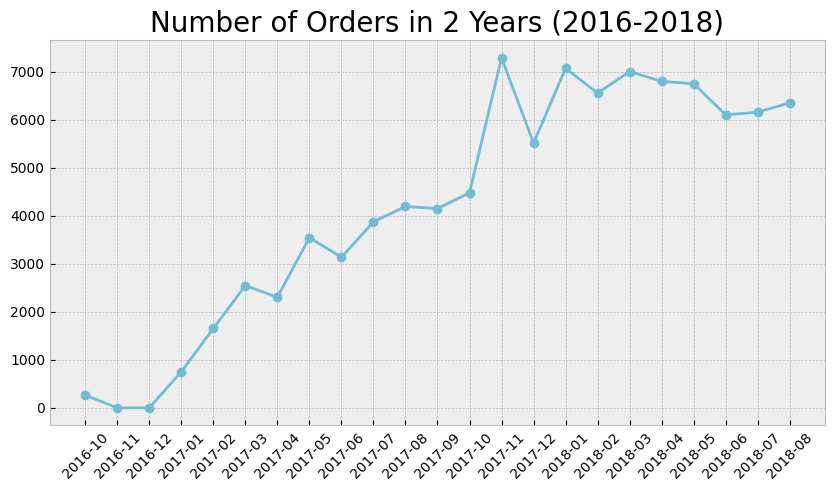

In [35]:
#Grafik berdasarkan jumlah order
plt.figure(figsize=(10, 5))
plt.style.use("bmh")
plt.plot(monthly_orders["order_purchase_timestamp"], monthly_orders["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders in 2 Years (2016-2018)", loc="center", fontsize=20) 
plt.xticks(rotation=45)
plt.yticks(fontsize=10) 
plt.show()

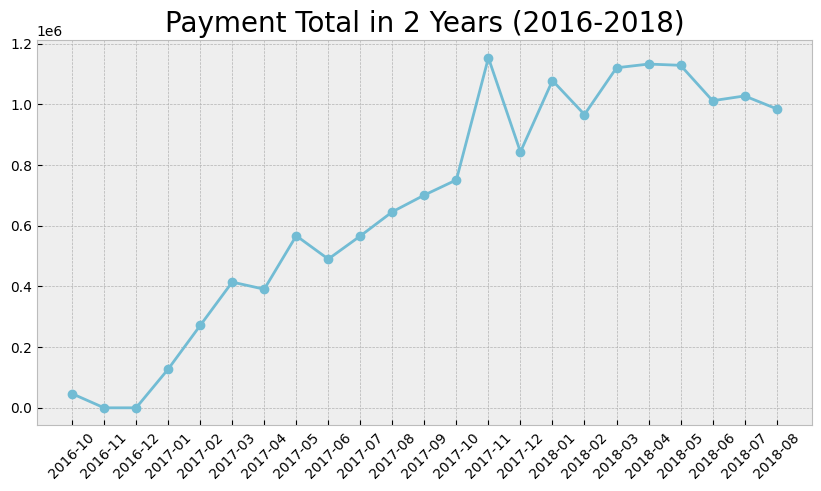

In [36]:
#Grafik berdasarkan jumlah pembayaran
plt.figure(figsize=(10, 5)) 
plt.style.use("bmh")
plt.plot(monthly_orders["order_purchase_timestamp"], monthly_orders["payment_value"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Payment Total in 2 Years (2016-2018)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10)
plt.show()

### Dimanakah lokasi pembeli produk terbayak?

In [37]:
order_by_state = orders.groupby(by="customer_state")["order_id"].nunique().reset_index()
order_by_state = order_by_state.sort_values(by='order_id', ascending=False)
order_by_state.columns = ['state', 'order_total']
order_by_state

,state,order_total
25,SP,40500
18,RJ,12350
10,MG,11354
22,RS,5345
17,PR,4923
23,SC,3546
4,BA,3256
6,DF,2080
7,ES,1995
8,GO,1957


Karena persebaran state sangat jauh, di sini akan dibuat 2 diagram untuk jumlah 5 terbanyak dan jumlah yang di bawah 5

In [38]:
#Menggabungkan semua negara customer yang berada di peringkat di bawah 5
up_state_6 = order_by_state.iloc[5:27]
up_state_6 = pd.DataFrame([
    ["others", up_state_6["order_total"].sum()]],
    columns=["state", "order_total"])
order_by_state5 = pd.concat([up_state_6, order_by_state.head()])
order_by_state5.sort_values(by="order_total", ascending=False).reset_index()

,index,state,order_total
0,25,SP,40500
1,0,others,22005
2,18,RJ,12350
3,10,MG,11354
4,22,RS,5345
5,17,PR,4923


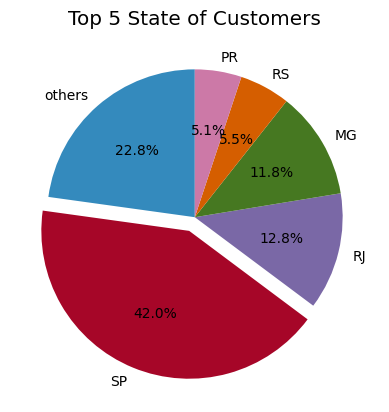

In [39]:
#Diagram Top 5
plt.pie(
    startangle = 90,
    x = order_by_state5["order_total"],
    labels = order_by_state5["state"],
    autopct = "%1.1f%%",
    explode = (0, 0.1, 0, 0, 0, 0)
)
plt.title("Top 5 State of Customers")
plt.show()

In [40]:
low5 = order_by_state.iloc[5:27]
low5.sort_values(by="order_total", ascending=False)

,state,order_total
23,SC,3546
4,BA,3256
6,DF,2080
7,ES,1995
8,GO,1957
15,PE,1593
5,CE,1279
13,PA,946
12,MT,886
9,MA,717


C:\Users\user\AppData\Local\Temp\ipykernel_3032\916815567.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_3032\916815567.py:8: UserWarning: 
The palette list has fewer values (1) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


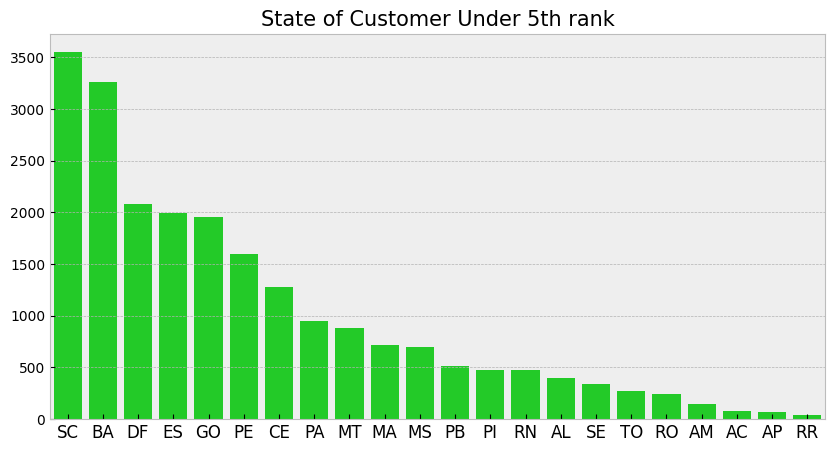

In [41]:
#Membuat diagram state customer rank dibawah5
low5 = order_by_state.iloc[5:27]
low5.sort_values(by="order_total", ascending=False)

plt.figure(figsize=(10, 5))
colors = ["#07e60e"]

sns.barplot(
    y="order_total", 
    x="state",
    data=low5,
    palette=colors
)
plt.title("State of Customer Under 5th rank", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### Kota dengan pembelian terbanyak

In [42]:
order_by_city = orders.groupby(by="customer_city")["order_id"].nunique().reset_index()
order_by_city = order_by_city.sort_values(by='order_id', ascending=False)
order_by_city.columns = ['city', 'order_total']
order_by_city

,city,order_total
3563,sao paulo,15045
3126,rio de janeiro,6601
449,belo horizonte,2697
553,brasilia,2071
1135,curitiba,1489
...,...,...
2924,populina,1
2923,ponto novo,1
2921,ponto do marambaia,1
2920,ponto belo,1


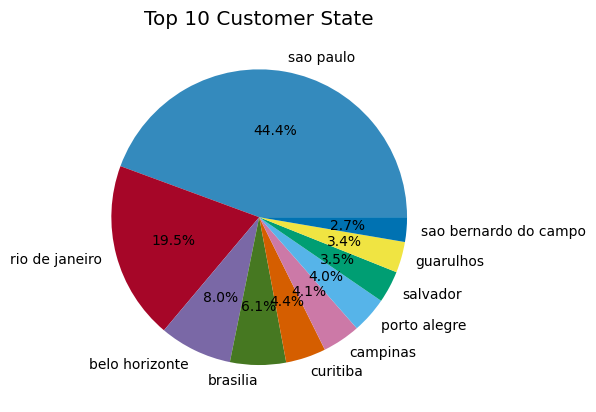

In [43]:
plt.pie(
    x=order_by_city["order_total"].head(10),
    labels=order_by_city["city"].head(10),
    autopct='%1.1f%%',
)
plt.title("Top 10 Customer State")
plt.show()

### Jenis barang apa yang paling banyak dan paling sedikit terjual?

In [44]:
id = order_items.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()
id.head()

,product_category_name_english,order_id
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449


C:\Users\user\AppData\Local\Temp\ipykernel_3032\1266676043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=id.head(), palette=colors, ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_3032\1266676043.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=id.sort_values(by="order_id", ascending=True).head(), palette=colors, ax=ax[1])


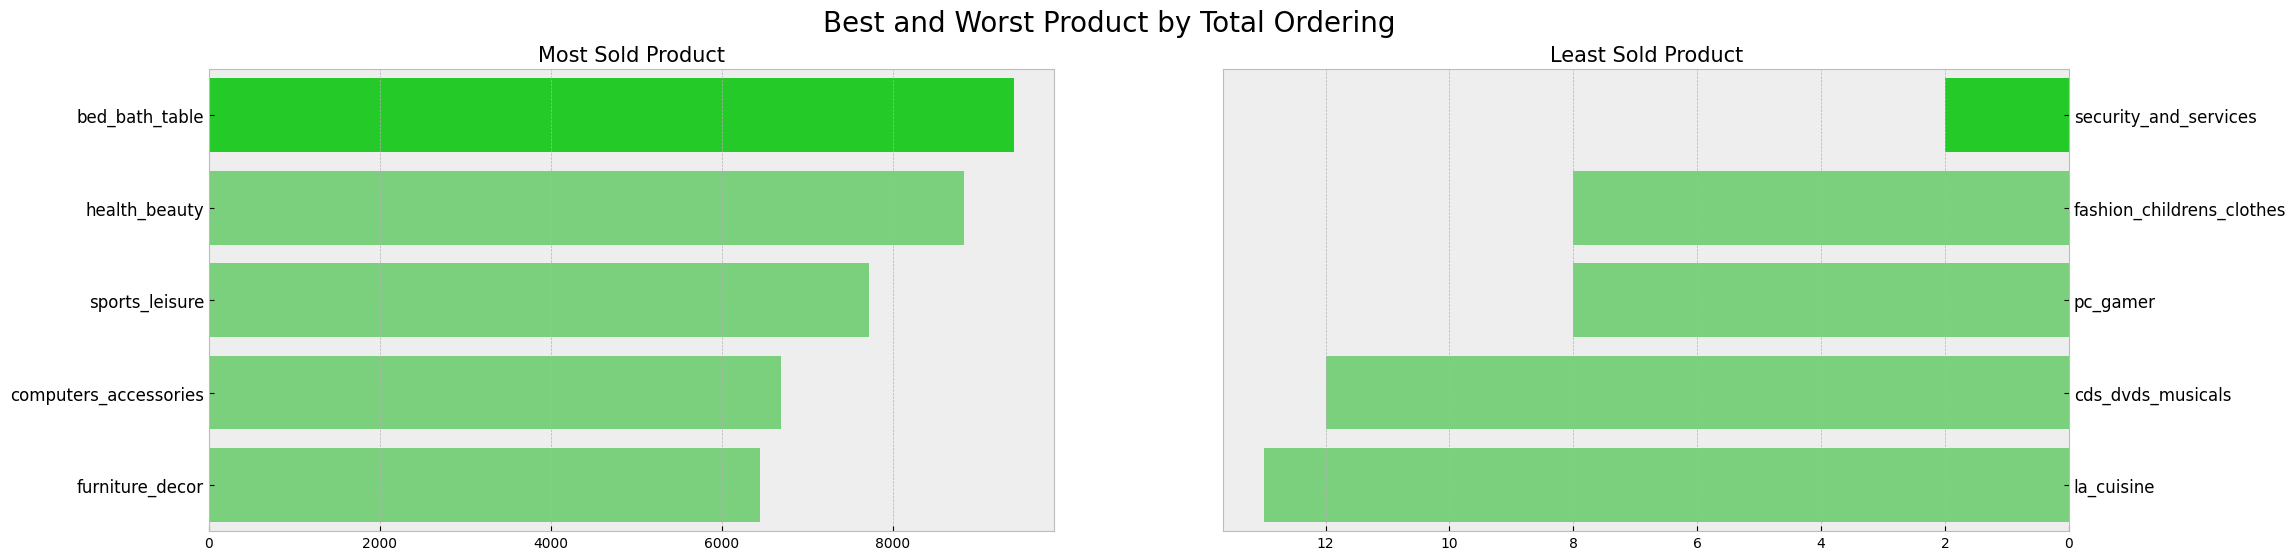

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#07e60e", "#6dde70", "#6dde70", "#6dde70", "#6dde70"]
 
sns.barplot(x="order_id", y="product_category_name_english", data=id.head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Sold Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_id", y="product_category_name_english", data=id.sort_values(by="order_id", ascending=True).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least Sold Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Product by Total Ordering", fontsize=20)
plt.show()

### Jenis barang apa yang memilki penilian terbaik dan terburuk?

In [46]:
score = order_items.review_score.mean()
score_data = order_items.groupby("product_category_name_english").review_score.mean().sort_values(ascending=False).reset_index()
score_data.head()

,product_category_name_english,review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.446266
3,costruction_tools_tools,4.444444
4,flowers,4.419355


C:\Users\user\AppData\Local\Temp\ipykernel_3032\2154312824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=score_data.head(), palette=colors, ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_3032\2154312824.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=score_data.sort_values(by="review_score", ascending=True).head(), palette=colors, ax=ax[1])


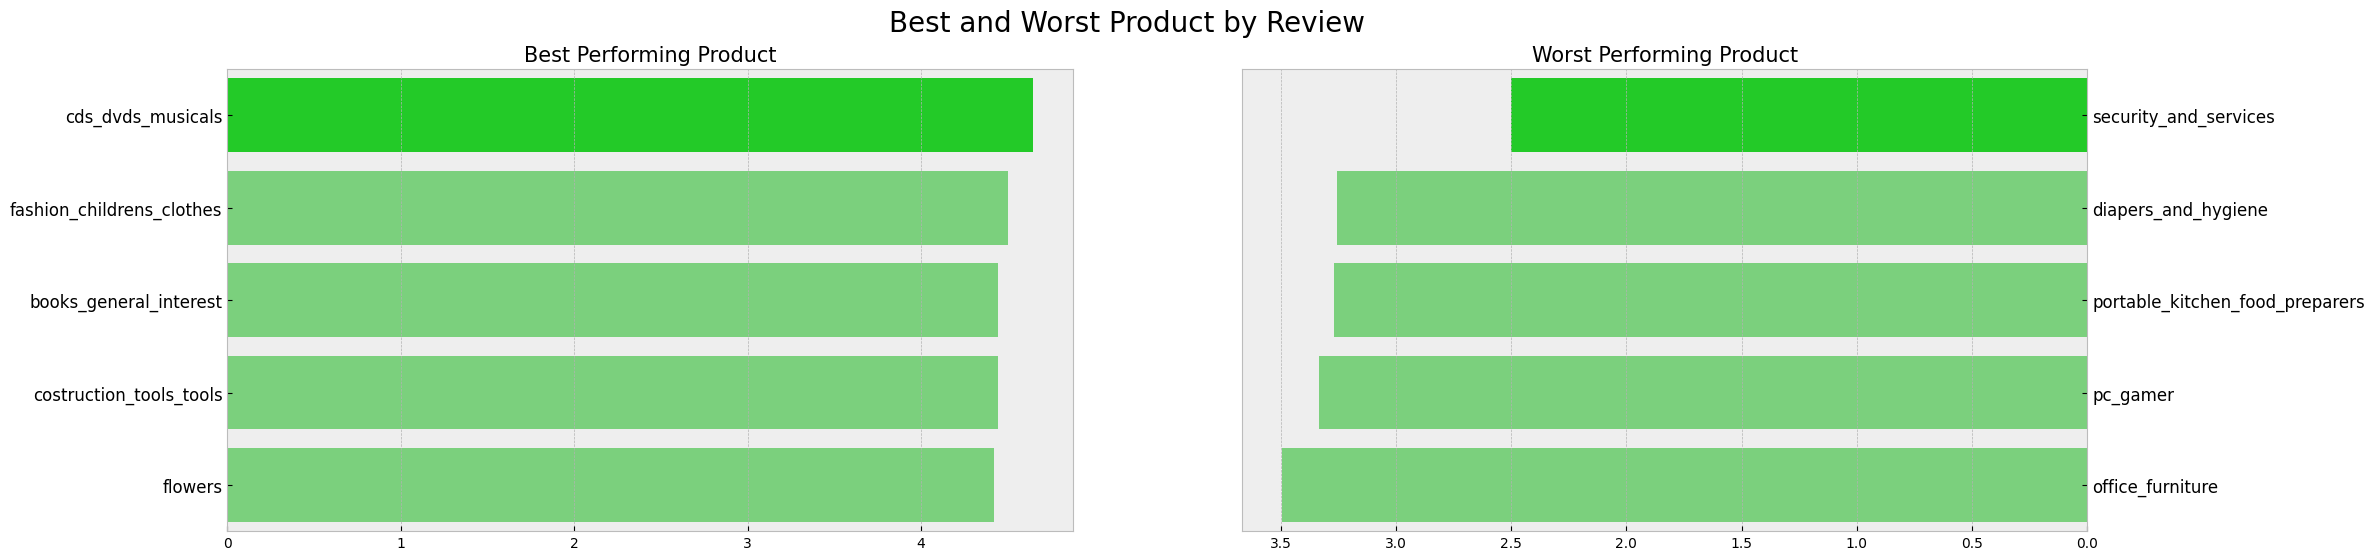

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#07e60e", "#6dde70", "#6dde70", "#6dde70", "#6dde70"]
 
sns.barplot(x="review_score", y="product_category_name_english", data=score_data.head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="review_score", y="product_category_name_english", data=score_data.sort_values(by="review_score", ascending=True).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Product by Review", fontsize=20)
plt.show()

## Conclusion

### Bagaimana grafik total pembayaran setiap bulannya?

Pada awalnya jumlah order dan pembayaran masih rendah.
Lalu pada bulan ke-12 tahun 2016 mulai mengalami peningkatan
hingga puncaknya pada bulan ke-11 tahun 2017

### Dimanakah lokasi pembeli produk terbanyak?

Pembelian produk terbanyak yaitu pada negara dengan kode SC, adapun di tingkat kota yaitu kota sao paulo

### Jenis barang apa yang paling banyak dan sedikit terjual?

Jenis barang yang paling banyak terjual yaitu bed_bath_table, dan yang paling sedikit yaitu dari kategori security_and_service

### Jenis barang apa yang memiliki penilaian terbaik dan terburuk?

Jenis barang yang memiliki penilaian terbaik berdasarkan penilaian dari customer yaitu cds_dvds_musicals, adapun penilaian terendah yaitu security_and_service

In [48]:
orders.to_csv("orders.csv", index=False)

In [49]:
order_items.to_csv("order_items.csv", index=False)